# Stimulus

* hmov version 03 (info in .xml file)
* resolution [424, 264] (info in log file or metadata file)
* pseudorandom sequence ID 01 (info in .xml file; search for "hmovTrain_0X-Y" with first X being the pseudorandom sequence ID [betw. 1 and 10] and Y being the training block number [from 1 to 8])
* .avi movies saved in mudata/exxpResources/hollymov/hmov_03/hmov_03_424x264sequences/

How much should the movie be downsampled? -> set scaling factor:

In [28]:
scaling = 0.06

### Test block

In [29]:
filepath_testblock = '/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTest.avi'
reader_testblock = imageio.get_reader(filepath_testblock)

In [30]:
width = reader_testblock.get_meta_data()['source_size'][0]
height = reader_testblock.get_meta_data()['source_size'][1]
nframes = reader_testblock.get_meta_data()['duration']*reader_testblock.get_meta_data()['fps']
movarr_scaled_testblock = np.empty([int(nframes), round(height*scaling), round(width*scaling)])

print('before downsampling: ', width, ',', height)
print('after downsampling: ', movarr_scaled_testblock.shape[1:])

before downsampling:  424 , 264
after downsampling:  (16, 25)


In [31]:
for i, im in enumerate(reader_testblock):
    imarray = np.asarray(im[:,:,0])
    im_transform = rescale(imarray, scaling)
    movarr_scaled_testblock[i,:,:] = im_transform
    
print(filepath_testblock)

/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTest.avi


### Train blocks

Loop through the training blocks and save them as scaled arrays in a list:

In [32]:
pseudorandom_seq = 1
mov_list_train = []

for train_block in range(1,9):# the avi files start with 1 instead of 0 and go until 8
    filepath = '/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTrain_0'+str(pseudorandom_seq)+'-'+str(train_block)+'.avi'
    reader_train = imageio.get_reader(filepath)
    
    width = reader_train.get_meta_data()['source_size'][0]
    height = reader_train.get_meta_data()['source_size'][1]
    nframes = reader_train.get_meta_data()['duration']*reader_train.get_meta_data()['fps']
    
    movarr_scaled_train = np.empty([int(nframes), round(height*scaling), round(width*scaling)])
    
    for i, im in enumerate(reader_train):
        imarray = np.asarray(im[:,:,0])
        im_transform = rescale(imarray, scaling)
        movarr_scaled_train[i,:,:] = im_transform
        
    mov_list_train.append(movarr_scaled_train)
    print(filepath)

/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTrain_01-1.avi
/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTrain_01-2.avi
/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTrain_01-3.avi
/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTrain_01-4.avi
/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTrain_01-5.avi
/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTrain_01-6.avi
/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTrain_01-7.avi
/gpfs01/berens/user/lschmors/Data/hmov_03_424x264/sequences/hmovTrain_01-8.avi


#### Combine Test and Train blocks

The stimulus starts with a Test block and ends with a Test block.

Every second element is a Train block:

In [33]:
mov_list = mov_list_train[:]

for position in range(len(mov_list_train)*2+1):
    if position%2==0:
        mov_list.insert(position, movarr_scaled_testblock)    

Sanity check:

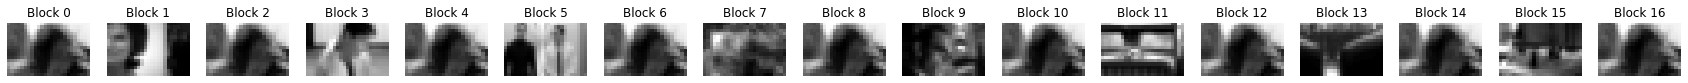

In [34]:
fig, axs = plt.subplots(1,17, figsize=(30,10))
axs = axs.ravel()

for a in range(17):
    axs[a].imshow(mov_list[a][0,:,:], cmap='gray')
    axs[a].axis('off')
    axs[a].set_title('Block '+str(a))
    

Convert list of stimulus blocks to array:

In [35]:
mov_array = np.vstack(mov_list)

In [36]:
stimulus = mov_array

In [40]:
stimulus.shape

(54000, 16, 25)

# Stimulus analysis

In [58]:
mov_train_array = np.vstack(mov_list_train)
mov_train_array.shape

(43200, 16, 25)

Show the mean of all training blocks

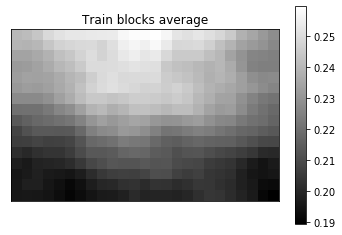

In [97]:
plt.imshow(np.mean(mov_train_array, axis=0), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.title('Train blocks average')

plt.savefig(('plots/stim_train_avg_grey.svg'))
plt.savefig(('plots/stim_train_avg_grey.png'), dpi = 300)

Show the mean of individual training blocks:

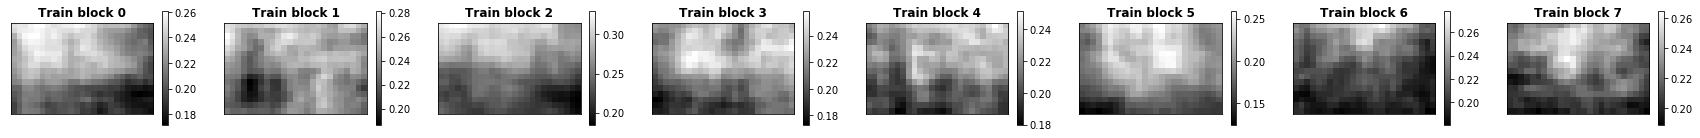

In [90]:
fig, axs = plt.subplots(1,8, figsize=(30,7))
axs = axs.ravel()

for a in range(8):
    im= axs[a].imshow(np.mean(mov_list_train[a], axis=0), cmap='gray')
    axs[a].set_xticks([])
    axs[a].set_xticklabels([])
    axs[a].set_yticks([])
    axs[a].set_yticklabels([])
    axs[a].set_title('Train block '+str(a), weight='bold')
    fig.colorbar(im, ax=axs[a], shrink=0.3)

fig.savefig(('plots/stim_subtrain_avg_grey.svg'))
fig.savefig(('plots/stim_subtrain_avg_grey.png'), dpi = 300)

Mean of test block:

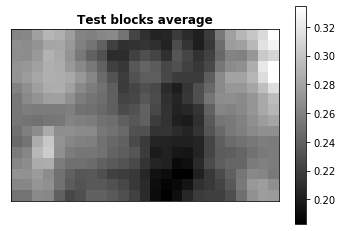

In [98]:
plt.imshow(np.mean(movarr_scaled_testblock, axis=0), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.title('Test blocks average', weight='bold')

plt.savefig(('plots/stim_test_avg_grey.svg'))
plt.savefig(('plots/stim_test_avg_grey.png'), dpi = 300)